PCA Hands On:
    1. PCA visualization.
    2. Eigenvector visualization.
    3. Plotting the eigenvectors.
    4. Transformation of the covariance matrix.
    5. Using PCA with prediction models.

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('mnist_data.csv', names=range(784), header=None)
labels = pd.read_csv('mnist_labels.csv', names=['labels'])
data['labels'] = labels

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [4]:
pca = PCA(n_components=2)
data_transformed = pca.fit_transform( data[data.columns.difference(['labels'])] )
data_transformed = pd.DataFrame(data_transformed, columns=['F1', 'F2'])

In [5]:
data_transformed

,F1,F2
0,135.768492,350.290037
1,1083.525305,321.299336
2,-72.578815,-445.152871
3,-875.709812,623.687021
4,-381.315657,-680.280620
5,156.725440,-207.750359
6,-689.954600,149.816490
7,496.933134,420.182657
8,-827.225477,49.231024
9,-299.430513,-506.143462


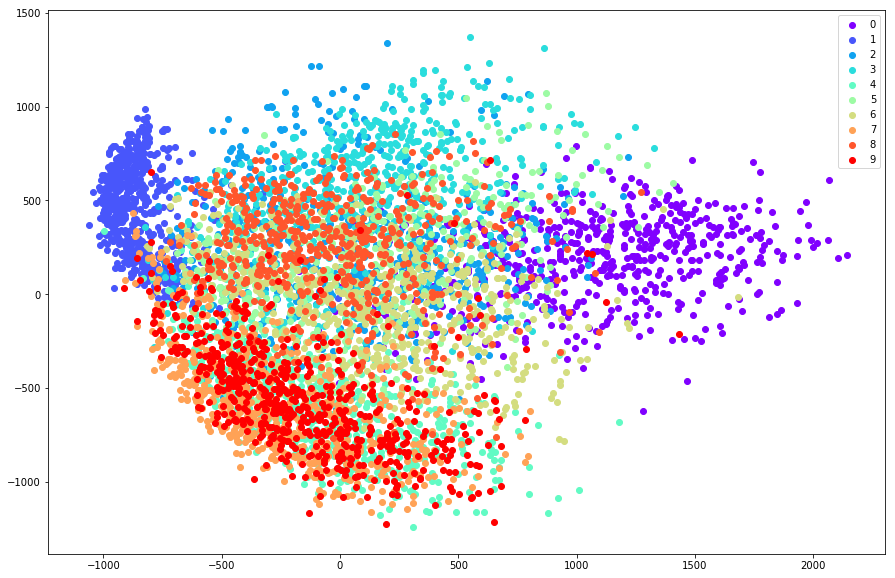

In [6]:
plt.figure(figsize=(15,10))

colors = plt.cm.rainbow(np.linspace(0, 1, 10))
for i in range(10):
    c = colors[i]
    data_class = data_transformed[data['labels']==i]
    plt.scatter(data_class['F1'], data_class['F2'], c=c, label=i)
plt.legend()

In [7]:
pca = PCA(n_components=10)
data_transformed = pca.fit_transform( data[data.columns.difference(['labels'])] )
data_transformed = pd.DataFrame(data_transformed)

In [8]:
pca_img1 = pca.components_[0].reshape((28,28))
pca_img2 = pca.components_[1].reshape((28,28))
pca_img3 = pca.components_[2].reshape((28,28))
pca_img4 = pca.components_[3].reshape((28,28))

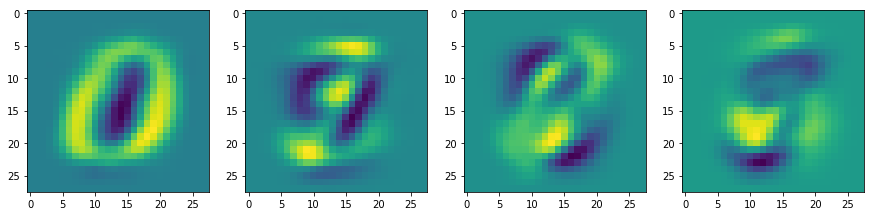

In [9]:
# Yellow positive, Blue negative
fig = plt.figure(figsize=(15,10))
fig.add_subplot(1,4,1)
plt.imshow(pca_img1)
fig.add_subplot(1,4,2)
plt.imshow(pca_img2)
fig.add_subplot(1,4,3)
plt.imshow(pca_img3)
fig.add_subplot(1,4,4)
plt.imshow(pca_img4)

In [10]:
# What are they trying to capture?

In [11]:
# Load the wine dataset
data = pd.read_csv('wine_original.csv')
labels = data['class']
del data['class']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=5)

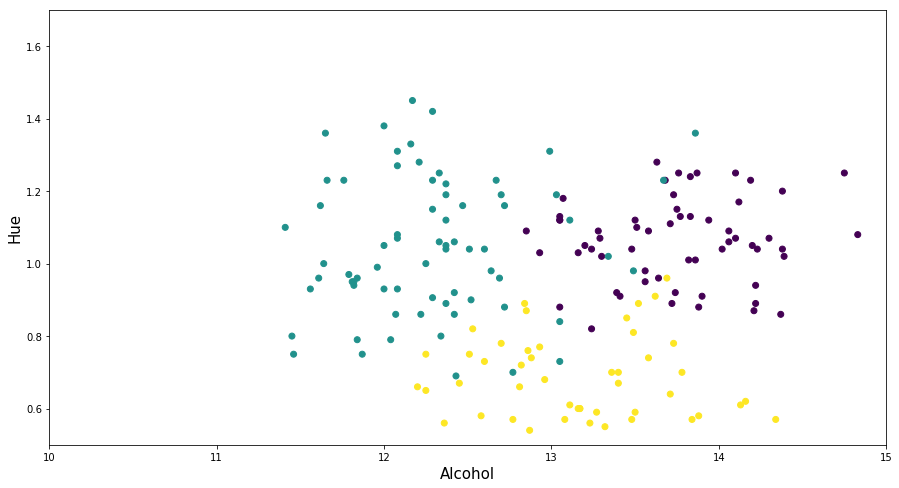

In [12]:
data_sub = data[['Alcohol', 'Hue']]
plt.figure(figsize=(15,8))
plt.xlabel('Alcohol', fontsize=15)
plt.ylabel('Hue', fontsize=15)
plt.xlim((10,15))
plt.ylim((0.5,1.7))
plt.scatter(data_sub['Alcohol'], data_sub['Hue'], c=labels)

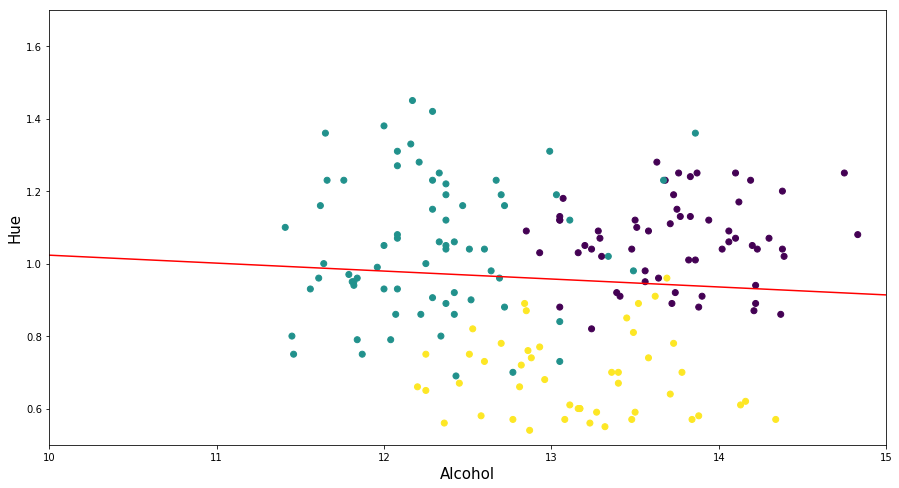

In [13]:
pca = PCA(n_components=1)
pca.fit(data_sub)

pca_comp = pca.components_[0]
factor = pca_comp[1]/pca_comp[0]
y_10 = factor*10 + np.mean(data_sub['Hue']) - factor*np.mean(data_sub['Alcohol'])
y_15 = factor*15 + np.mean(data_sub['Hue']) - factor*np.mean(data_sub['Alcohol'])

plt.figure(figsize=(15,8))
plt.xlabel('Alcohol', fontsize=15)
plt.ylabel('Hue', fontsize=15)
plt.xlim((10,15))
plt.ylim((0.5,1.7))
plt.scatter(data_sub['Alcohol'], data_sub['Hue'], c=labels)
plt.plot([10,15],[y_10,y_15], 'r-')



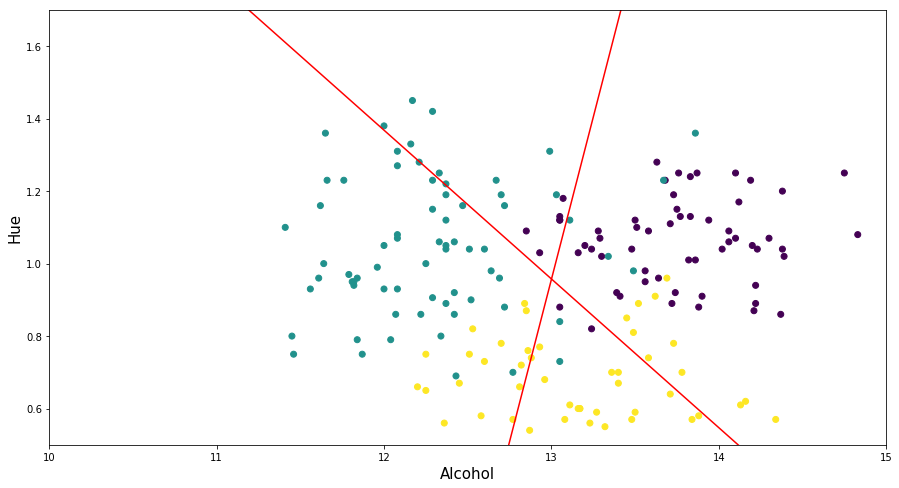

In [14]:
pca = PCA(n_components=2)
pca.fit(data)

pca_comp = pca.components_[0]
factor = pca_comp[1]/pca_comp[0]
y_10 = factor*10 + np.mean(data['Hue']) - factor*np.mean(data['Alcohol'])
y_15 = factor*15 + np.mean(data['Hue']) - factor*np.mean(data['Alcohol'])


pca_comp = pca.components_[1]
factor = pca_comp[1]/pca_comp[0]
x_5 = (0.5 - np.mean(data['Hue']) + factor*np.mean(data['Alcohol']))/factor
x_17 = (1.7 - np.mean(data['Hue']) + factor*np.mean(data['Alcohol']))/factor

plt.figure(figsize=(15,8))
plt.xlabel('Alcohol', fontsize=15)
plt.ylabel('Hue', fontsize=15)
plt.xlim((10,15))
plt.ylim((0.5,1.7))
plt.scatter(data['Alcohol'], data['Hue'], c=labels)
plt.plot([10,15],[y_10,y_15], 'r-')
plt.plot([x_5,x_17],[0.5,1.7], 'r-')


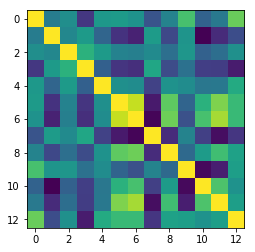

In [29]:
plt.imshow(data.corr())

In [30]:
pca = PCA(n_components=13)
data_transformed = pca.fit_transform( data )
data_transformed = pd.DataFrame(data_transformed)

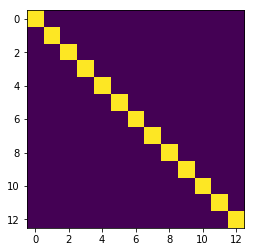

In [31]:
plt.imshow(data_transformed.corr())

In [15]:
# What will be the values of correlation matrix?

In [16]:
# What will be the values of covariance matrix?

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# Data Transformation
pca = PCA(n_components=5)
X_train_new = pd.DataFrame(pca.fit_transform(X_train))
X_test_new = pd.DataFrame(pca.transform(X_test))

#Model
clf = KNeighborsClassifier(1)
clf.fit(X_train_new, y_train)
pred = clf.predict(X_test_new)
print ('Test Accuracy: ', str(accuracy_score(y_test, pred)))

Test Accuracy:  0.75


# PRACTICE QUESTION

1. Read the MNIST dataset. Split it into train and test data (80-20).
2. Perform PCA on the data and plot the test accuracy with increasing dimensions of the data till 100 dimensions. (Use the 1-nn classifier)